**Module 9**<br>
**ATMOS 5340: Environmental Programming and Statistics**<br>
**John Horel and Derek Mallia**<br>
<br>

<br>

> # Announcement: 
> Your 6th programming assignment on 2D and map plotting will be due in 2 1/2 weeks.

> # Today's Objective<br>
> Introduction to 2D plotting with Python using the Matplotlib library<br>
> Create simple 2D plots<br>
> Adjust plotting elemements of 2D plots<br>
> Working with different 2D plot types (contour, color-filled contour, & vector maps)<br>
<br><br>
In addition to todays lecture, it is *highly* recommended that you review **Chapter 12** of the DeCaria text
<br><br>
Before starting: Make sure that you open up a Jupyter notebook session using OnDemand so you can interactively follow along with today's lecture!
<br><br>
Today's juypter notebook lecture can be grabbed from my Atmos 5340 directory on CHPC:<br><br>
*/uufs/chpc.utah.edu/common/home/u0703457/public_html/dereks_homepage/Atmos_5340/scripts*



## Contour plots

Contour plots are usually employed to display 2D data such as those from numerical weather prediction models. Usually, this data is provided to the contour plotting function as a 2D array. Contour plots are created using the pyplot.contour function `pyplot.contour()` or through the `axes.contour()` method. In reality, this is not that much different than creating a 1D plot... 
<br>
<br>

Before we can make some plots, lets grab some sample data that we can play around with. Open up a linux terminal and copy the following files into your working directory. In addition, maybe it would be good to create a working directory specifically for todays lecture.
<br><br>
Copy the following files:
<br>
*/uufs/chpc.utah.edu/common/home/u0703457/public_html/dereks_homepage/Atmos_5340/class_files/heights.npy*
*/uufs/chpc.utah.edu/common/home/u0703457/public_html/dereks_homepage/Atmos_5340/class_files/uandv.npz*
<br>
<br>
Once you do this, we should be ready to make some slick looking plots! First, lets import some libraries.





In [1]:
import matplotlib.pyplot as plt
import numpy as np



In [2]:
#Lets load our predefined python array object 'heights.npy'
z = np.load('../class_files/heights.npy')

In [3]:
#Lets look at our data quickly and see what we are working with!
print(type(z))
print(z.shape)
print('Max value ='+str(np.max(z)))
print('Min value ='+str(np.min(z)))
print('Mean value ='+str(np.mean(z)))

<class 'numpy.ndarray'>
(101, 75)
Max value =5818.788996625898
Min value =5475.841476545013
Mean value =5656.427301628287


Looks like we are working with a 2D numpy array with 101 rows and 75 columns. With values ranging between 5656.42 and 5818.78. Lets see what this data looks like visually using the `plt.contour()` function! In this example, the array will also be transposed before contouring as this data sets first dimension is for columns, and the second is for rows. This is opposite of how matplotlib interprets the ordering of rows vs. columns.

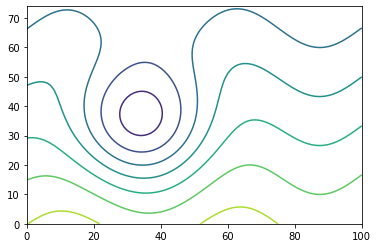

In [4]:
plt.contour(np.transpose(z))

If a single arguement is fed into the `plt.contour` function, the x and y axes are assumed as 
being consecutive integers that span the length of our array `z` dimensions (0-100 & 0-74). 
In most case, 2D data sets often contain information about our axes, else the data would be rather 
useless. For the pruposes of this example, lets assume our array has a grid spacing of 10 km, 
with the lower left corner of our being positioned at 0 km. 


In [5]:
x = np.arange(0,z.shape[0])*10  #1D array of x values
y = np.arange(0,z.shape[1])*10  #1D array of y values

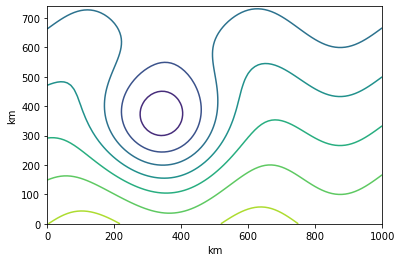

In [6]:
#Now lets plot up our data again... Also lets add some labels!
plt.contour(x,y,np.transpose(z))
plt.xlabel('km')
plt.ylabel('km')
plt.show()

Neat! What do you think we are looking at?

The 4th argument for `plt.contour()` can be used to specify the number of evenly spaced contours (which are automatically defined by matplotlib):

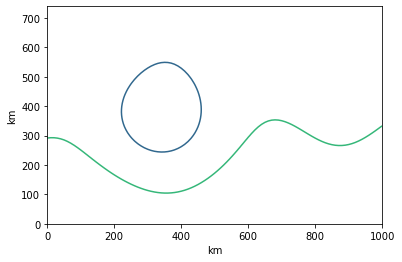

In [7]:
plt.contour(x,y,np.transpose(z),2)
plt.xlabel('km')
plt.ylabel('km')
plt.show()

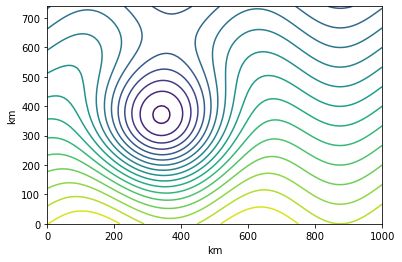

In [8]:
plt.contour(x,y,np.transpose(z),20)
plt.xlabel('km')
plt.ylabel('km')
plt.show()

While we just made some cool looking contour plots, we have only just scratched the surface on the 2D plotting options available when using matplotlib! For example:

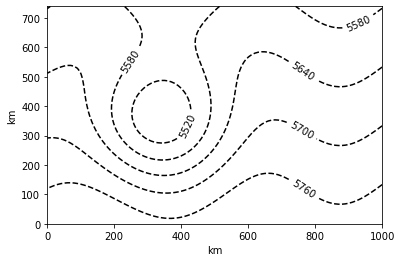

In [9]:
#Lets add some labels to our contour lines, in addition 
#to manually specifying the contours we want to plot, along 
#with the color and contour line style.

contour_l = plt.contour(x,y,np.transpose(z),
                        levels = range(5400,6000,60),
                        colors='black',linestyles='--')
plt.clabel(contour_l,fmt='%.0f',inline=True)
plt.xlabel('km')
plt.ylabel('km')
plt.show()

There are other ways we can control contour plot labels<br>
>- `fontsize`: This is a point value for the size of contour labels
>- `colors`: Specifies the color of our labels and is provided as a string.
>- `inline_spacing`: Numerical value that specifies the number of pixels to leave blank surrounding in-line contour labels
>- `rightside_up`: A boolean value that determines whether labels can be placed upside down.   

What happens if we set inline to false? What happens if we don't specify a color? Play around with this for a few minutes and see what happens!

Matplotlib also has options for displaying data as an array of pixels with 
different colors based on the value within the pixel. This is potentially a 
good way to plot particurly noisey data sets, which exhibit extreme variability 
(like anthroponenic emissions). Sometimes it takes a little trial and error to 
determine the best method for plotting a specific data set!
<br><br>
In the example below is the same data we plotted above, but using the `plt.pcolormesh()`
function instead of `plt.contour()`:  

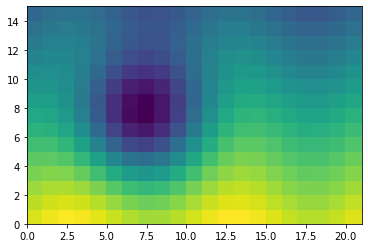

In [10]:
plt.pcolormesh(np.transpose(z[::5,::5]))

For pcolormesh plots, you can also define the edges of gridcells by defining the edgecolor arguement:

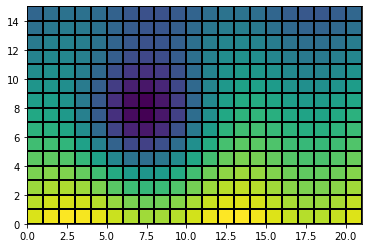

In [11]:
plt.pcolormesh(np.transpose(z[::5,::5]),edgecolors = 'black')

Similar to a pcolormesh plot, we can also add colors to contour plots using "color-filled contours". To call color-filled contours, we simply evoke the `plt.contourf()` function, which should not to be confused the contour only function `plt.contour()` that we went overly earlier. An example of the `plt.contourf()` function in action can be seen below:

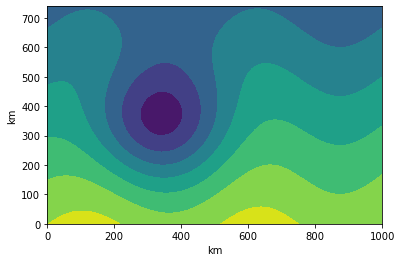

In [12]:
#Now lets plot up our data again... Also lets add some labels!
plt.contourf(x,y,np.transpose(z))
plt.xlabel('km')
plt.ylabel('km')
plt.show()

We can also change our color table that we are using (default) to something a bit more 
exciting by using the cmap arguement within the `plt.contourf()` argument 'cmap':

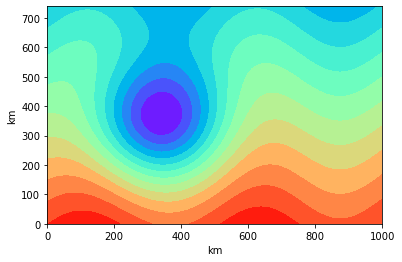

In [13]:
cmap = plt.cm.rainbow       #Lets define a color map
plt.contourf(x,y,np.transpose(z),15,cmap = cmap)
plt.xlabel('km')
plt.ylabel('km')
plt.show()

or...

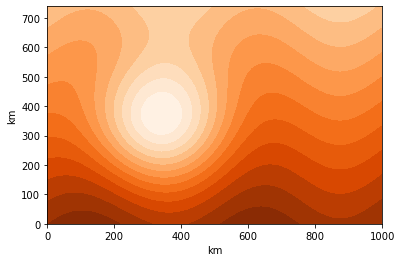

In [14]:
cmap = plt.cm.Oranges
plt.contourf(x,y,np.transpose(z),15,cmap = cmap)
plt.xlabel('km')
plt.ylabel('km')
plt.show()

Matplotlib even gives you the ability to overlay different plots on top of each other. 
For example, what if I wanted both a contour and a color-filled contour map?

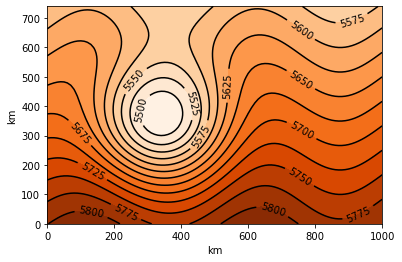

In [15]:
cmap = plt.cm.Oranges
cf = plt.contourf(x,y,np.transpose(z),15,cmap = cmap)
cl = plt.contour(x,y,np.transpose(z),15,colors='black')
plt.clabel(cl,fmt='%.0f',inline=True)
plt.xlabel('km')
plt.ylabel('km')
plt.show()

While a tad redundant in this case, we can also add a color bar....

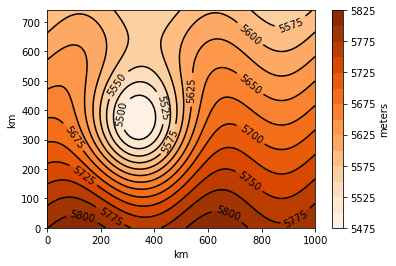

In [16]:
cmap = plt.cm.Oranges
cf = plt.contourf(x,y,np.transpose(z),15,cmap = cmap)
cl = plt.contour(x,y,np.transpose(z),15,colors='black')
cb = plt.colorbar(cf)
cb.set_label('meters')
plt.clabel(cl,fmt='%.0f',inline=True)
plt.xlabel('km')
plt.ylabel('km')
plt.show()

Looking pretty spiffy, right? 😎 👌   
<br><br>

Now that we've gone over a bunch of plotting options, lets see what kind of contour maps 
you can come up with! For the next 10 minutes, go ahead and play around our python numpy array 
of Geopotential heights and show me what you can come up! Have your plot match your personality 
and style! For example, my favorite color is green, so I would totally run with a green themed 
contour plot. If you are brave, you could even come up with your own numpy array to show off!

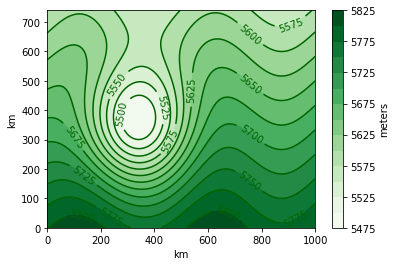

In [17]:
cmap = plt.cm.Greens
cf = plt.contourf(x,y,np.transpose(z),15,cmap = cmap)
cl = plt.contour(x,y,np.transpose(z),15,colors='darkgreen')
cb = plt.colorbar(cf)
cb.set_label('meters')
plt.clabel(cl,fmt='%.0f',inline=True)  
plt.xlabel('km')
plt.ylabel('km')
plt.show()

<br><br>
## Vector, wind barbs, and streamline maps

In addition to making contour maps, Python also has the ability to create two-dimensional 
plots of vector quantities such as winds. Data representing a vector field can be plotted 
using the `plt.quiver()` function. Unlike the `plt.contour()` function, we will need to supply 
and x and y component to plot our vector field (technically, u and v components for wind). 
<br><br>
The `plt.quiver(x,y,u,v,mag)` function has the following arguments:
>- `x`: An array of x coordinates that represents the location of our vector.
>- `y`: An array of y coordinates that represents the location of our vector.
>- `u`: An array of the x-components of our vector field.
>- `v`: An array of the y-components of our vector field.
>- `mag`: Optional argument for defining the magnitude of our vector. If this is included, vectors are also plotted as colors that represent different magitudes. If this is omitted, vectors are plotted with the same color.
>- `pivot`: denotes where the tail of the arrow is drawn relative to the data point and is provided as a string (`tip`,`middle`,`tail`).
<br><br>

As a starting point lets load up some data!
<br><Br>


In [18]:
import matplotlib.pyplot as plt
import numpy as np

#Read in our data. Will load gridded geopotential height data and wind data. 
z = np.transpose(np.load('../class_files/heights.npy'))
V = np.load('../class_files/uandv.npz')
x = np.transpose(V['x'])
y = np.transpose(V['y'])
u = np.transpose(V['u'])
v = np.transpose(V['v'])

<br>
Ok, lets try plotting up our wind data as a starting point....
<br><br>

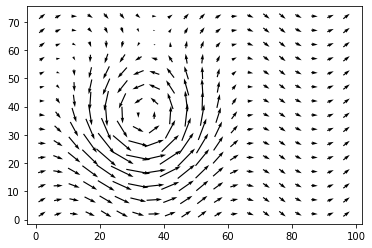

In [19]:
plt.quiver(x,y,u,v,pivot='middle')

Looks like a wind field! Lets play around with a few things, for example, 
lets set something for the `mag` argument:
<br><br>

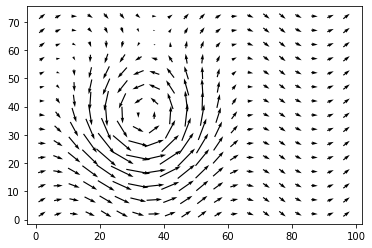

In [20]:
plt.quiver(x,y,u,v,pivot='middle',cmap=cmap)

<br>
Now, lets compute and then set the magnitude of our u- and v-wind components...
<br><br>

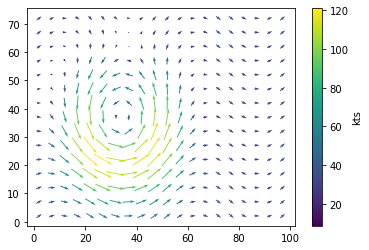

In [21]:
cmap = plt.cm.viridis              #Define a color map
wspd = np.sqrt(u**2 + v**2)        #Compute our wind speed 

#Make our plot...
quiv = plt.quiver(x,y,u,v,wspd,pivot='middle',cmap=cmap)
cb = plt.colorbar(quiv)
cb.set_label('kts')


<br>
We can even overlay a quiver map on a color-filled contour map!
<br><br>

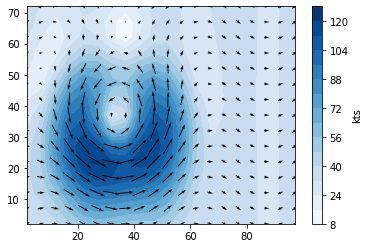

In [22]:
cmap = plt.cm.Blues              #Define a color map
wspd = np.sqrt(u**2 + v**2)      #Compute our wind speed 

#Make our plot...
cf_wspd = plt.contourf(x,y,wspd,15,cmap = cmap)
plt.quiver(x,y,u,v,pivot='middle')
cb = plt.colorbar(cf_wspd)
cb.set_label('kts')

Or we can just overlay this on a totally different variable as well, such as geopotential heights...

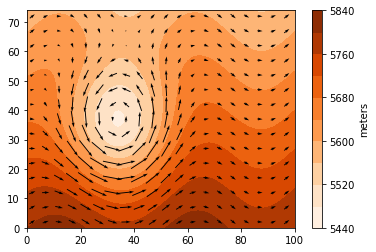

In [23]:
cmap = plt.cm.Oranges            #Define a color map
wspd = np.sqrt(u**2 + v**2)      #Compute our wind speed 

#Make our plot...
cf_geoph = plt.contourf(z,10,cmap = cmap)
plt.quiver(x,y,u,v,pivot='middle')
cb = plt.colorbar(cf_geoph)
cb.set_label('meters')

**Wind barbs:** Python also has the ability to plot wind data as wind barbs. 
The function that plots wind barbs `plt.barbs()` is pretty close the syntax of 
the `plt.quiver()` function as seen below:
<br><br>



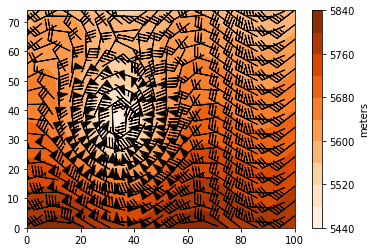

In [24]:
cmap = plt.cm.Oranges            #Define a color map
wspd = np.sqrt(u**2 + v**2)      #Compute our wind speed 
#Make our plot...
cf_geoph = plt.contourf(z,10,cmap = cmap)
plt.barbs(x,y,u,v,pivot='middle')
cb = plt.colorbar(cf_geoph)
cb.set_label('meters')


Obvioulsy, this looks a little busy compared our wind vectors, 
so we may want to stride the data a line to thin out the wind barb
data points... 
<br><br>

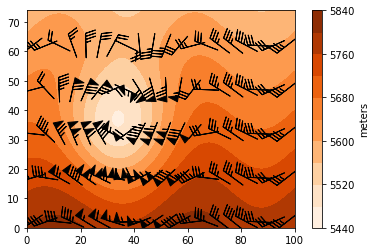

In [25]:
cmap = plt.cm.Oranges            #Define a color map
wspd = np.sqrt(u**2 + v**2)      #Compute our wind speed 
#Make our plot...
cf_geoph = plt.contourf(z,10,cmap = cmap)
plt.barbs(x[::3],y[::3],u[::3],v[::3],pivot='middle')
cb = plt.colorbar(cf_geoph)
cb.set_label('meters')

<br>
That looks a little cleaner... look at those previous class concepts coming in handy! 😉
<br><br>

**Streamlines:** Finally, we also have the streamline function `plt.streamplot()` at our disposal for plotting wind fields as stream lines. Like the `plt.barbs()` and `plt.quiver()` functions, we need arguments for both x and y- components of our vector:
<br><br>


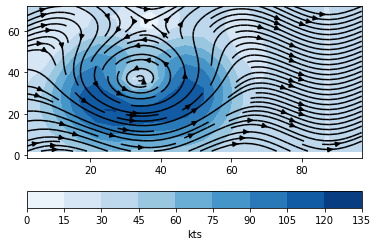

In [26]:
cmap = plt.cm.Blues            #Define a color map
wspd = np.sqrt(u**2 + v**2)      #Compute our wind speed 
#Make our plot...
cf_wspd = plt.contourf(x,y,wspd,10,cmap = cmap)
plt.streamplot(x,y,u,v,density=1,color='black')
cb = plt.colorbar(cf_wspd,orientation='horizontal')
cb.set_label('kts')

Note how we also changed the position of the color bar to horizontal in this example...

<br><br>
## Aspect ratio

Before we wrap up basic 2D plotting, its worth noting that the programmer 
also has the ability to change the aspect ratio of plots. For example in the maps above,
our plots our longer in width than height since our axes run from 0 to 70 (y) and 0 to 100 (x). 
Unsurprisingly, this results in a plot that is longer in width, and shorter in height. 
Fortunately, we can control this behavior by using the axes.set_aspect() method, which 
requires a single argument provided as a string:
>- `auto`: Default setting
>- `equal`: Forces x and y axes to have equal length when being physically plotted.
>- `num`: Set as either an integer or floating number which represents the aspect ratio of
    y/x

    
Lets looks at a few examples..

<br><br>Auto aspect ratio

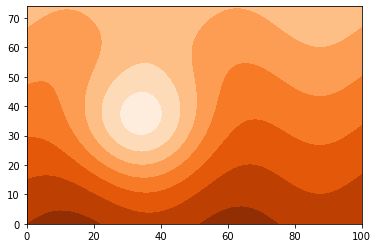

In [27]:
cmap = plt.cm.Oranges              #Define a color map

#Make our plot...
fig, ax = plt.subplots()
cf_wspd = ax.contourf(z,cmap = cmap)
ax.set_aspect('auto')

<br><br>Equal aspect ratio

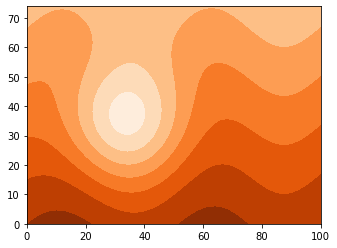

In [28]:
cmap = plt.cm.Oranges               #Define a color map

#Make our plot...
fig, ax = plt.subplots()
cf_wspd = ax.contourf(z,cmap = cmap)
ax.set_aspect('equal')

<br><br>User specified aspect ration

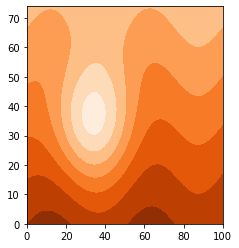

In [29]:
cmap = plt.cm.Oranges               #Define a color map

#Make our plot...
fig, ax = plt.subplots()
cf_wspd = ax.contourf(z,cmap = cmap)
ax.set_aspect(1.5)

<br>
And you get the idea...
<br><br>

**Next week** we will continue with 2D plotting, but will now incorporate map into our contour and vector plots!